In [1]:
import os
import torch

os.environ['CUDA_LAUNCH_BLOCKING'] = '1'
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
import torchvision
import matplotlib.pyplot as plt
from einops import rearrange

torch.Size([3, 1365, 2048])


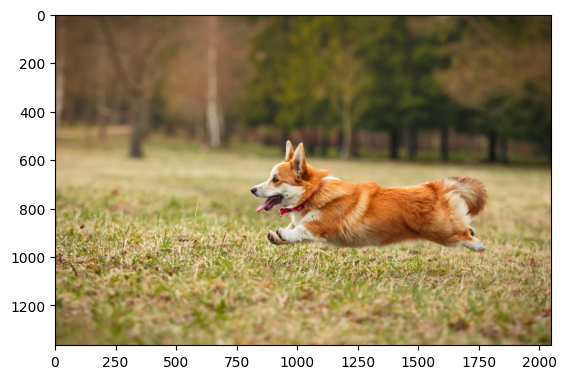

In [3]:
# Read in a image from torchvision
img = torchvision.io.read_image("dog.jpg")
print(img.shape)
# print(img)
plt.imshow(rearrange(img,'c h w -> h w c'))

torch.Size([3, 300, 300])


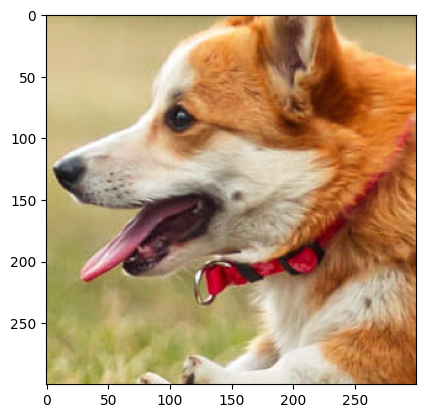

In [6]:
from sklearn import preprocessing
scaler_img=preprocessing.MinMaxScaler().fit(img.reshape(-1,1))
img_scaled = scaler_img.transform(img.reshape(-1, 1)).reshape(img.shape)
img_scaled.shape
# print(img_scaled)
img_scaled=torch.tensor(img_scaled)
img_scaled=img_scaled.to(device)
img=torchvision.transforms.functional.crop(img_scaled.cpu(),600,800,300,300)
plt.imshow(rearrange(img, 'c h w -> h w c').cpu().numpy())
print(img.shape)

In [7]:
def get_patch(image, patch_size, x_min, y_min):
    patch_tensor = img  # Extract patch using PyTorch operations
    patch = patch_tensor.cpu().numpy()  # Convert to NumPy array
    return patch


In [11]:
import numpy as np
def is_mostly_single_color(patch):
    # Use NumPy standard deviation function
    return np.std(patch) < 0.1


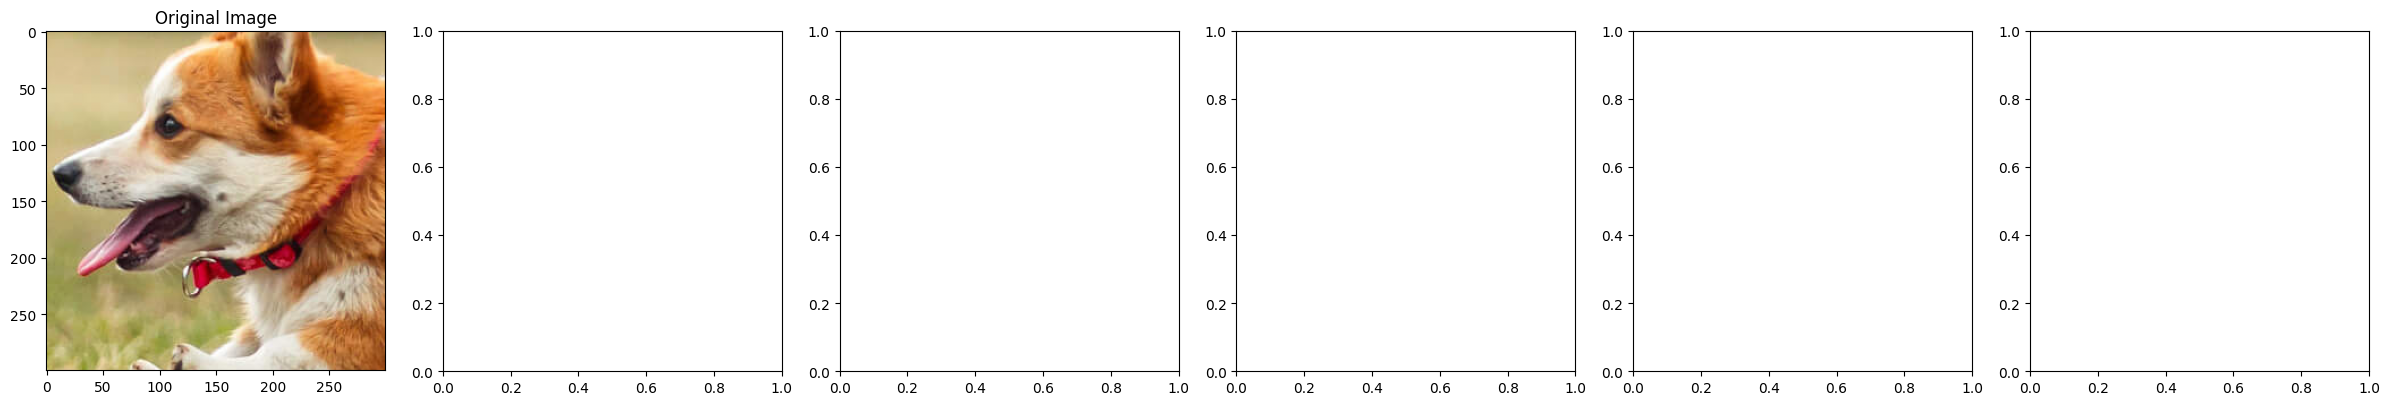

In [26]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def plot_image_with_patch(image, patch_size, x, y, ax, highlight_color="red"):
    """Converts image to numpy array, plots with patch highlighting."""
    image_np = rearrange(image, 'c h w -> h w c').cpu().numpy()
    fig, ax = plt.subplots()
    ax.imshow(image_np)
    rect = patches.Rectangle((x, y), patch_size, patch_size, linewidth=2, edgecolor=highlight_color, facecolor='none')
    ax.add_patch(rect)
    ax.set_xlim(0, image.shape[1])
    ax.set_ylim(image.shape[0], 0)  # Assuming image origin is top-left
    ax.set_title("Image with Patches")

# Load your image (replace with your code)
image = img

# Image and patch parameters
image_shape = (3, 300, 300)
patch_size = 30
min_x = 0
max_x = image.shape[2] - patch_size
min_y = image.shape[1] - patch_size
max_y = 0
fig, axs = plt.subplots(1, 6, figsize=(24, 4))

# Plot the whole image in the first subplot
image_np = rearrange(image, 'c h w -> h w c').cpu().numpy()
axs[0].imshow(image_np)
axs[0].set_title("Original Image")

# Plot patches in the remaining subplots
plot_counter = 0
for y in range(image_shape[1] - patch_size, 0, -10):
    for x in range(0, image_shape[2] - patch_size, 10):
        patch = get_patch(image_np, patch_size, x, y)
        if is_mostly_single_color(patch):
            plot_image_with_patch(image_np, patch_size, x, y, axs[plot_counter + 1])  # Adjust index for subplots
            # plot_counter += 1
            if plot_counter >= 5:  # Stop after filling 5 subplots
                break

# Adjust layout and show
plt.tight_layout()
plt.show()
